In [4]:
import pandas as pd

# Load the phishing dataset
# Read the first 10,000 rows from the CSV file
df_phishing = pd.read_csv('verified_online.csv', nrows=10000)
df_phishing.tail()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
9995,8540819,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-18T00:21:56+00:00,yes,2024-04-18T00:33:12+00:00,yes,Other
9996,8540818,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-18T00:11:53+00:00,yes,2024-04-18T00:23:00+00:00,yes,Other
9997,8540761,https://www.xxfj168.com/,http://www.phishtank.com/phish_detail.php?phis...,2024-04-17T23:00:22+00:00,yes,2024-04-17T23:03:39+00:00,yes,Other
9998,8540739,http://yandexv.com/honorcu/,http://www.phishtank.com/phish_detail.php?phis...,2024-04-17T22:20:52+00:00,yes,2024-04-17T22:22:53+00:00,yes,Other
9999,8540729,https://cloudflare-ipfs.com/ipfs/bafybeia5e6rj...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-17T21:37:51+00:00,yes,2024-04-17T21:53:04+00:00,yes,LinkedIn


In [5]:
# Load the benign dataset
df_benign = pd.read_csv('Philippine_Benign_Bank_Links.csv')
df_benign.head()

,url,type
0,https://www.eastwestbanker.com/,benign
1,https://www.eastwestbanker.com/business,benign
2,https://priority.eastwestbanker.com/,benign
3,https://www.eastwestbanker.com/about,benign
4,https://m.me/EastWestBanker,benign


In [6]:
# Drop all columns except "url" in both datasets
df_phishing = df_phishing[['url']]
df_benign = df_benign[['url']]

# Add a new column called "type" filled with the value "phishing" for the phishing dataset
df_phishing['type'] = 'phishing'

# Add a new column called "type" filled with the value "benign" for the benign dataset
df_benign['type'] = 'benign'

# Concatenate the two datasets
df = pd.concat([df_phishing, df_benign])

# Save the concatenated DataFrame to a CSV file
df.to_csv('combined_dataset.csv', index=False)

# Print the count of phishing and benign URLs
print("Count of Phishing URLs:", len(df[df['type'] == 'phishing']))
print("Count of Benign URLs:", len(df[df['type'] == 'benign']))

df.head()

Count of Phishing URLs: 10000
Count of Benign URLs: 6574


,url,type
0,https://docs.google.com/presentation/d/e/2PACX...,phishing
1,https://verification-cloud.netlify.app/,phishing
2,https://cookingpastaready.com/app/app/user.php,phishing
3,https://fuorifrigo.com/vershteln/app/user.php,phishing
4,https://https-open-spotify-com-intl-one-servic...,phishing


In [7]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [8]:
def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

In [9]:
def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [10]:
from urllib.parse import urlparse

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domain'] = df['url'].apply(lambda i: no_of_embed(i))

In [11]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [12]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Edzel Armengol\AppData\Local\Temp\ipykernel_17804\423109293.py:2: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tiny

In [13]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

df['count-digits']= df['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))


In [14]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [15]:
from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [16]:
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

import nltk
from nltk.tokenize import RegexpTokenizer


In [17]:
df.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,count-www,count%,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length
0,https://docs.google.com/presentation/d/e/2PACX...,phishing,0,0,175,0,1,1,0,2,0,0,1,5,3,12,140,1,1,15
1,https://verification-cloud.netlify.app/,phishing,0,0,39,0,1,1,0,2,0,0,0,1,0,0,32,1,1,30
2,https://cookingpastaready.com/app/app/user.php,phishing,0,0,46,0,1,1,0,2,0,0,0,0,0,0,38,1,1,21
3,https://fuorifrigo.com/vershteln/app/user.php,phishing,0,0,45,0,1,1,0,2,0,0,0,0,0,0,37,1,1,14
4,https://https-open-spotify-com-intl-one-servic...,phishing,0,0,66,0,2,2,0,2,0,0,0,6,0,0,53,1,1,54


In [18]:
pip install tld

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\edzel armengol\appdata\local\programs\python\python312\lib\site-packages\dlib-19.24.4-py3.12-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))


df2 = df.copy()


In [20]:
df.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld,tld_length
0,https://docs.google.com/presentation/d/e/2PACX...,phishing,0,0,175,0,1,1,0,2,...,5,3,12,140,1,1,15,12,com,3
1,https://verification-cloud.netlify.app/,phishing,0,0,39,0,1,1,0,2,...,1,0,0,32,1,1,30,0,netlify.app,11
2,https://cookingpastaready.com/app/app/user.php,phishing,0,0,46,0,1,1,0,2,...,0,0,0,38,1,1,21,3,com,3
3,https://fuorifrigo.com/vershteln/app/user.php,phishing,0,0,45,0,1,1,0,2,...,0,0,0,37,1,1,14,9,com,3
4,https://https-open-spotify-com-intl-one-servic...,phishing,0,0,66,0,2,2,0,2,...,6,0,0,53,1,1,54,2,com,3


In [21]:
df = df.drop("tld", axis=1)

In [22]:
df.columns

Index(['url', 'type', 'use_of_ip', 'count@', 'url_length',
       'count_embed_domain', 'count-https', 'count-http', 'short_url',
       'count.', 'count-www', 'count%', 'count?', 'count-', 'count=',
       'count-digits', 'count-letters', 'abnormal_url', 'google_index',
       'hostname_length', 'fd_length', 'tld_length'],
      dtype='object')

In [23]:
df['type'].value_counts()

type
phishing    10000
benign       6574
Name: count, dtype: int64

In [24]:
df.shape

(16574, 22)

In [25]:
# Separate DataFrame into two based on 'type' column
df_benign = df[df['type'] == 'benign']
df_phishing = df[df['type'] == 'phishing']


In [26]:
df_benign.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
0,https://www.eastwestbanker.com/,benign,0,0,31,0,1,1,0,2,...,0,0,0,0,25,1,1,22,0,3
1,https://www.eastwestbanker.com/business,benign,0,0,39,0,1,1,0,2,...,0,0,0,0,33,1,1,22,8,3
2,https://priority.eastwestbanker.com/,benign,0,0,36,0,1,1,0,2,...,0,0,0,0,30,1,1,27,0,3
3,https://www.eastwestbanker.com/about,benign,0,0,36,0,1,1,0,2,...,0,0,0,0,30,1,1,22,5,3
4,https://m.me/EastWestBanker,benign,0,0,27,0,1,1,0,1,...,0,0,0,0,22,1,1,4,14,2


In [27]:
df_benign.shape

(6574, 22)

In [28]:
df_phishing.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
0,https://docs.google.com/presentation/d/e/2PACX...,phishing,0,0,175,0,1,1,0,2,...,1,5,3,12,140,1,1,15,12,3
1,https://verification-cloud.netlify.app/,phishing,0,0,39,0,1,1,0,2,...,0,1,0,0,32,1,1,30,0,11
2,https://cookingpastaready.com/app/app/user.php,phishing,0,0,46,0,1,1,0,2,...,0,0,0,0,38,1,1,21,3,3
3,https://fuorifrigo.com/vershteln/app/user.php,phishing,0,0,45,0,1,1,0,2,...,0,0,0,0,37,1,1,14,9,3
4,https://https-open-spotify-com-intl-one-servic...,phishing,0,0,66,0,2,2,0,2,...,0,6,0,0,53,1,1,54,2,3


In [29]:
df_phishing.shape

(10000, 22)

In [30]:
df_benign.describe()


,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,count-www,count%,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
count,6574.0,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.0,6574.000000,6574.000000,6574.000000
mean,0.0,0.001825,59.172041,0.008366,0.969425,1.001825,0.002890,2.616215,0.784606,0.127320,0.107393,1.657438,0.134165,1.690447,46.963949,0.999544,1.0,16.648768,8.525859,4.313204
std,0.0,0.042689,28.552029,0.091091,0.184956,0.052299,0.053687,0.847824,0.414444,1.564401,0.310617,2.315735,0.504908,8.319819,21.360213,0.021359,0.0,4.285278,7.737173,1.582563
min,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000,-1.000000
25%,0.0,0.000000,41.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,1.000000,1.0,14.000000,4.000000,3.000000
50%,0.0,0.000000,54.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,43.000000,1.000000,1.0,16.000000,8.000000,3.000000
75%,0.0,0.000000,71.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,57.000000,1.000000,1.0,19.000000,11.000000,6.000000
max,0.0,1.000000,625.000000,1.000000,2.000000,2.000000,1.000000,12.000000,2.000000,81.000000,2.000000,23.000000,13.000000,226.000000,322.000000,1.000000,1.0,43.000000,150.000000,7.000000


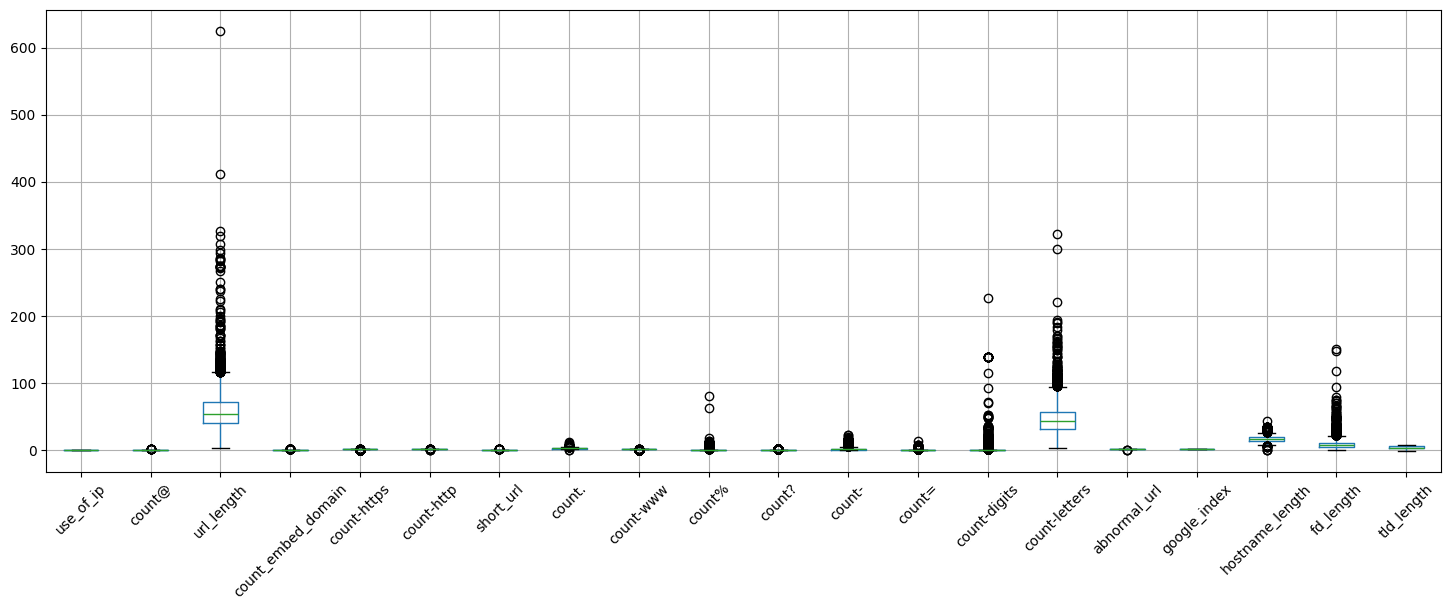

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
df_benign.boxplot()
plt.xticks(rotation=45)
plt.show()


In [32]:
import pandas as pd
from scipy import stats

# Assuming df_benign is already defined and contains the necessary data

# List of columns to process
columns_to_process = [
    'use_of_ip', 'count@', 'url_length', 'count_embed_domain', 'count-https', 'count-http',
    'short_url', 'count.', 'count-www', 'count%', 'count?', 'count-', 'count=', 'count-digits',
    'count-letters', 'abnormal_url', 'google_index', 'hostname_length', 'fd_length', 'tld_length'
]

# Dictionary to hold the DataFrames for each column
outliers_dfs = {}

# Threshold for Z-scores to consider an outlier
threshold = 3

# Total count of outliers
total_outliers_count = 0

print("Outliers in Benign Dataset using Z-Score\n")

# Loop through each column to calculate Z-scores, find outliers, and create DataFrames
for column in columns_to_process:
    # Calculate Z-scores
    z_scores = stats.zscore(df_benign[column])

    # Find outliers
    outliers = (z_scores > threshold) | (z_scores < -threshold)

    # Filter out the outliers
    outliers_df = df_benign[outliers]

    # Increment the total count of outliers
    total_outliers_count += len(outliers_df)

    # Create a DataFrame with the 'url', the column value, and the Z-score
    outliers_with_z_scores = pd.DataFrame({
        'url': outliers_df['url'],
        column: outliers_df[column],
        'z_score': z_scores[outliers]
    })

    # Add a column for the number of outliers, setting the value in the first row only
    outliers_with_z_scores['number_of_outliers'] = [len(outliers_with_z_scores)] + [None] * (len(outliers_with_z_scores) - 1)

    # Store the DataFrame in the dictionary
    outliers_dfs[column] = outliers_with_z_scores

    # Print the amount of outliers for the current column
    print(f"{column}: {len(outliers_df)}")

print("\nTotal amount of outliers in the Benign dataset using Z-score: " + str(total_outliers_count))

df.head()


Outliers in Benign Dataset using Z-Score

use_of_ip: 0
count@: 12
url_length: 61
count_embed_domain: 55
count-https: 231
count-http: 18
short_url: 19
count.: 21
count-www: 0
count%: 59
count?: 2
count-: 153
count=: 112
count-digits: 49
count-letters: 73
abnormal_url: 3
google_index: 0
hostname_length: 31
fd_length: 89
tld_length: 3

Total amount of outliers in the Benign dataset using Z-score: 991


C:\Users\Edzel Armengol\AppData\Local\Temp\ipykernel_17804\2029648442.py:27: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = stats.zscore(df_benign[column])


,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
0,https://docs.google.com/presentation/d/e/2PACX...,phishing,0,0,175,0,1,1,0,2,...,1,5,3,12,140,1,1,15,12,3
1,https://verification-cloud.netlify.app/,phishing,0,0,39,0,1,1,0,2,...,0,1,0,0,32,1,1,30,0,11
2,https://cookingpastaready.com/app/app/user.php,phishing,0,0,46,0,1,1,0,2,...,0,0,0,0,38,1,1,21,3,3
3,https://fuorifrigo.com/vershteln/app/user.php,phishing,0,0,45,0,1,1,0,2,...,0,0,0,0,37,1,1,14,9,3
4,https://https-open-spotify-com-intl-one-servic...,phishing,0,0,66,0,2,2,0,2,...,0,6,0,0,53,1,1,54,2,3


In [33]:
import pandas as pd

# Assuming df_benign is already defined and contains the necessary data

# List of columns to process
columns_to_process = [
    'use_of_ip', 'count@', 'url_length', 'count_embed_domain', 'count-https', 'count-http',
    'short_url', 'count.', 'count-www', 'count%', 'count?', 'count-', 'count=', 'count-digits',
    'count-letters', 'abnormal_url', 'google_index', 'hostname_length', 'fd_length', 'tld_length'
]

# Dictionary to hold the DataFrames for each column
outliers_dfs = {}

# Total count of outliers
total_outliers_count = 0

print("Outliers in Benign Dataset using Interquartile Range (IQR)\n")

# Loop through each column to calculate IQR, find outliers, and create DataFrames
for column in columns_to_process:
    # Calculate the first and third quartiles
    Q1 = df_benign[column].quantile(0.25)
    Q3 = df_benign[column].quantile(0.75)

    # Calculate the interquartile range
    IQR = Q3 - Q1

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = (df_benign[column] < lower_bound) | (df_benign[column] > upper_bound)

    # Filter out the outliers
    outliers_df = df_benign[outliers]

    # Increment the total count of outliers
    total_outliers_count += len(outliers_df)

    # Create a DataFrame with the 'url', the column value, and the IQR
    outliers_with_IQR = pd.DataFrame({
        'url': outliers_df['url'],
        column: outliers_df[column],
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    })

    # Add a column for the number of outliers, setting the value in the first row only
    outliers_with_IQR['number_of_outliers'] = [len(outliers_with_IQR)] + [None] * (len(outliers_with_IQR) - 1)

    # Store the DataFrame in the dictionary
    outliers_dfs[column] = outliers_with_IQR

    # Print the amount of outliers for the current column
    print(f"{column}: {len(outliers_df)}")

print("\nTotal amount of outliers in the Benign dataset using Interquartile Range (IQR): " + str(total_outliers_count))


Outliers in Benign Dataset using Interquartile Range (IQR)

use_of_ip: 0
count@: 12
url_length: 173
count_embed_domain: 55
count-https: 231
count-http: 18
short_url: 19
count.: 46
count-www: 1434
count%: 128
count?: 704
count-: 391
count=: 676
count-digits: 1323
count-letters: 166
abnormal_url: 3
google_index: 0
hostname_length: 78
fd_length: 254
tld_length: 0

Total amount of outliers in the Benign dataset using Interquartile Range (IQR): 5711


In [34]:
df_phishing.describe()

,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,count-www,count%,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,10000.000000,10000.000000,10000.00000
mean,0.00160,0.018000,57.623200,0.001000,0.882100,1.01320,0.072000,2.122200,0.058700,0.047300,0.149300,0.896000,0.323000,6.204400,42.77170,0.999800,1.0,24.337900,5.349400,5.79420
std,0.03997,0.135933,57.508107,0.031609,0.364709,0.14501,0.258501,0.929599,0.236347,0.736286,0.382393,1.581023,0.947713,11.218833,45.36759,0.014141,0.0,14.001697,10.526243,4.10869
min,0.00000,0.000000,15.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,0.000000,1.0,4.000000,0.000000,-1.00000
25%,0.00000,0.000000,28.000000,0.000000,1.000000,1.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.00000,1.000000,1.0,15.000000,0.000000,3.00000
50%,0.00000,0.000000,40.000000,0.000000,1.000000,1.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,30.00000,1.000000,1.0,21.000000,2.000000,3.00000
75%,0.00000,0.000000,62.000000,0.000000,1.000000,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,44.00000,1.000000,1.0,30.000000,9.000000,9.00000
max,1.00000,3.000000,1403.000000,1.000000,6.000000,7.00000,1.000000,18.000000,2.000000,34.000000,8.000000,28.000000,10.000000,261.000000,1260.00000,1.000000,1.0,94.000000,270.000000,29.00000


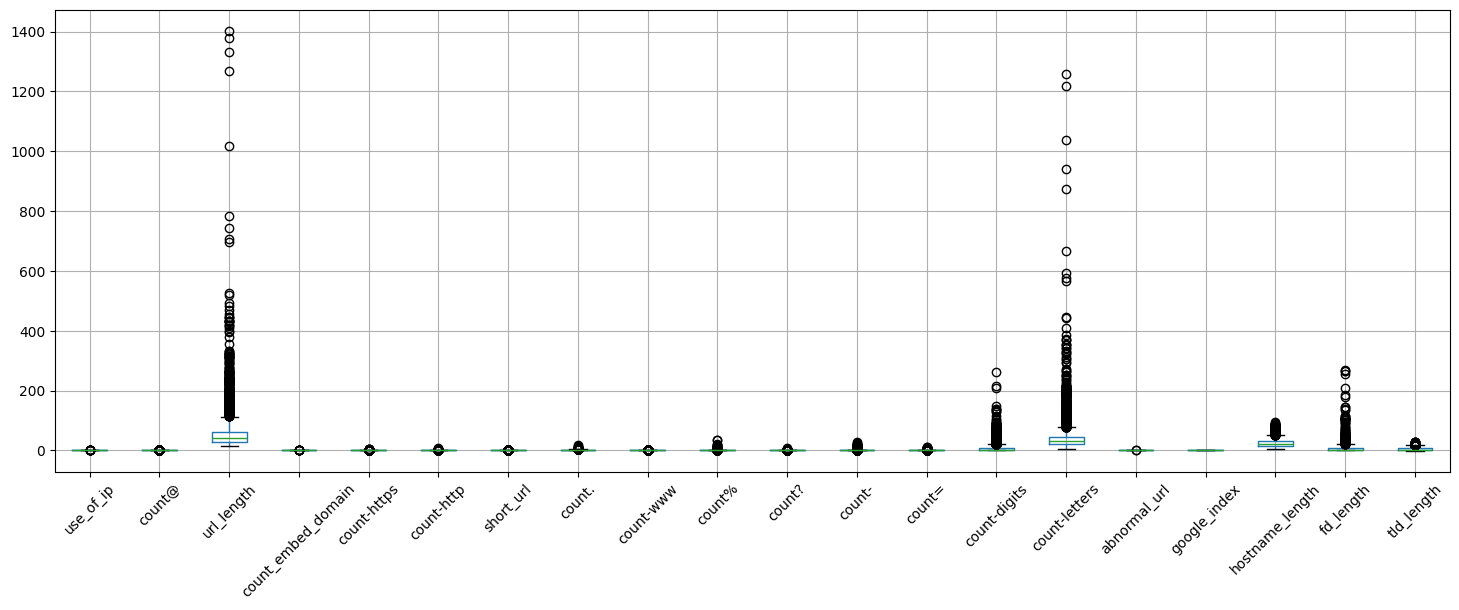

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
df_phishing.boxplot()
plt.xticks(rotation=45)
plt.show()


In [36]:
import pandas as pd
from scipy import stats

# Assuming df_benign is already defined and contains the necessary data

# List of columns to process
columns_to_process = [
    'use_of_ip', 'count@', 'url_length', 'count_embed_domain', 'count-https', 'count-http',
    'short_url', 'count.', 'count-www', 'count%', 'count?', 'count-', 'count=', 'count-digits',
    'count-letters', 'abnormal_url', 'google_index', 'hostname_length', 'fd_length', 'tld_length'
]

# Dictionary to hold the DataFrames for each column
outliers_dfs = {}

# Threshold for Z-scores to consider an outlier
threshold = 3

# Total count of outliers
total_outliers_count = 0

print("Outliers in Phishing Dataset using Z-Score\n")

# Loop through each column to calculate Z-scores, find outliers, and create DataFrames
for column in columns_to_process:
    # Calculate Z-scores
    z_scores = stats.zscore(df_phishing[column])

    # Find outliers
    outliers = (z_scores > threshold) | (z_scores < -threshold)

    # Filter out the outliers
    outliers_df = df_phishing[outliers]

    # Increment the total count of outliers
    total_outliers_count += len(outliers_df)

    # Create a DataFrame with the 'url', the column value, and the Z-score
    outliers_with_z_scores = pd.DataFrame({
        'url': outliers_df['url'],
        column: outliers_df[column],
        'z_score': z_scores[outliers]
    })

    # Add a column for the number of outliers, setting the value in the first row only
    outliers_with_z_scores['number_of_outliers'] = [len(outliers_with_z_scores)] + [None] * (len(outliers_with_z_scores) - 1)

    # Store the DataFrame in the dictionary
    outliers_dfs[column] = outliers_with_z_scores

    # Print the amount of outliers for the current column
    print(f"{column}: {len(outliers_df)}")

print("\nTotal amount of outliers in the Phishing dataset using Z-score: " + str(total_outliers_count))

Outliers in Phishing Dataset using Z-Score

use_of_ip: 16
count@: 177
url_length: 102
count_embed_domain: 10
count-https: 98
count-http: 111
short_url: 720
count.: 197
count-www: 584
count%: 42
count?: 65
count-: 160
count=: 193
count-digits: 132
count-letters: 94
abnormal_url: 2
google_index: 0
hostname_length: 204
fd_length: 101
tld_length: 227

Total amount of outliers in the Phishing dataset using Z-score: 3235


C:\Users\Edzel Armengol\AppData\Local\Temp\ipykernel_17804\2539757173.py:27: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = stats.zscore(df_phishing[column])


In [37]:
import pandas as pd

# Assuming df_benign is already defined and contains the necessary data

# List of columns to process
columns_to_process = [
    'use_of_ip', 'count@', 'url_length', 'count_embed_domain', 'count-https', 'count-http',
    'short_url', 'count.', 'count-www', 'count%', 'count?', 'count-', 'count=', 'count-digits',
    'count-letters', 'abnormal_url', 'google_index', 'hostname_length', 'fd_length', 'tld_length'
]

# Dictionary to hold the DataFrames for each column
outliers_dfs = {}

# Total count of outliers
total_outliers_count = 0

print("Outliers in Phishing Dataset using Interquartile Range (IQR)\n")

# Loop through each column to calculate IQR, find outliers, and create DataFrames
for column in columns_to_process:
    # Calculate the first and third quartiles
    Q1 = df_phishing[column].quantile(0.25)
    Q3 = df_phishing[column].quantile(0.75)

    # Calculate the interquartile range
    IQR = Q3 - Q1

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = (df_phishing[column] < lower_bound) | (df_phishing[column] > upper_bound)

    # Filter out the outliers
    outliers_df = df_phishing[outliers]

    # Increment the total count of outliers
    total_outliers_count += len(outliers_df)

    # Create a DataFrame with the 'url', the column value, and the IQR
    outliers_with_IQR = pd.DataFrame({
        'url': outliers_df['url'],
        column: outliers_df[column],
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    })

    # Add a column for the number of outliers, setting the value in the first row only
    outliers_with_IQR['number_of_outliers'] = [len(outliers_with_IQR)] + [None] * (len(outliers_with_IQR) - 1)

    # Store the DataFrame in the dictionary
    outliers_dfs[column] = outliers_with_IQR

    # Print the amount of outliers for the current column
    print(f"{column}: {len(outliers_df)}")

print("\nTotal amount of outliers in the Phishing dataset using Interquartile Range (IQR): " + str(total_outliers_count))


Outliers in Phishing Dataset using Interquartile Range (IQR)

use_of_ip: 16
count@: 177
url_length: 1008
count_embed_domain: 10
count-https: 1391
count-http: 111
short_url: 720
count.: 197
count-www: 584
count%: 139
count?: 1420
count-: 937
count=: 1324
count-digits: 626
count-letters: 1097
abnormal_url: 2
google_index: 0
hostname_length: 439
fd_length: 238
tld_length: 227

Total amount of outliers in the Phishing dataset using Interquartile Range (IQR): 10663


In [38]:
df.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
0,https://docs.google.com/presentation/d/e/2PACX...,phishing,0,0,175,0,1,1,0,2,...,1,5,3,12,140,1,1,15,12,3
1,https://verification-cloud.netlify.app/,phishing,0,0,39,0,1,1,0,2,...,0,1,0,0,32,1,1,30,0,11
2,https://cookingpastaready.com/app/app/user.php,phishing,0,0,46,0,1,1,0,2,...,0,0,0,0,38,1,1,21,3,3
3,https://fuorifrigo.com/vershteln/app/user.php,phishing,0,0,45,0,1,1,0,2,...,0,0,0,0,37,1,1,14,9,3
4,https://https-open-spotify-com-intl-one-servic...,phishing,0,0,66,0,2,2,0,2,...,0,6,0,0,53,1,1,54,2,3


In [39]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\edzel armengol\appdata\local\programs\python\python312\lib\site-packages\dlib-19.24.4-py3.12-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# CNN


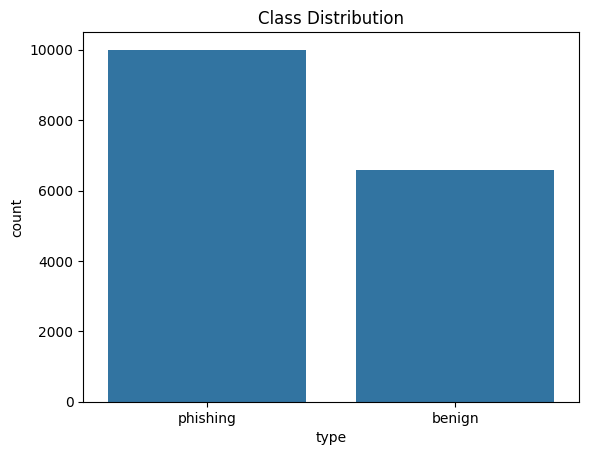

c:\Users\Edzel Armengol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/7
363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.7440 - loss: 0.4943 - val_accuracy: 0.9903 - val_loss: 0.0482
Epoch 2/7
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9937 - loss: 0.0472 - val_accuracy: 0.9936 - val_loss: 0.0229
Epoch 3/7
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.9985 - loss: 0.0171 - val_accuracy: 0.9944 - val_loss: 0.0183
Epoch 4/7
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9992 - loss: 0.0101 - val_accuracy: 0.9952 - val_loss: 0.0145
Epoch 5/7
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9995 - loss: 0.0062 - val_accuracy: 0.9960 - val_loss: 0.0148
Epoch 6/7
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9999 - loss: 0.0036 - val_accuracy: 0.9960 - val_loss: 0.0139
Epoch 7/7
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9960 - val_loss: 0.0142
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9967 - loss: 0.0112
Validation Accuracy

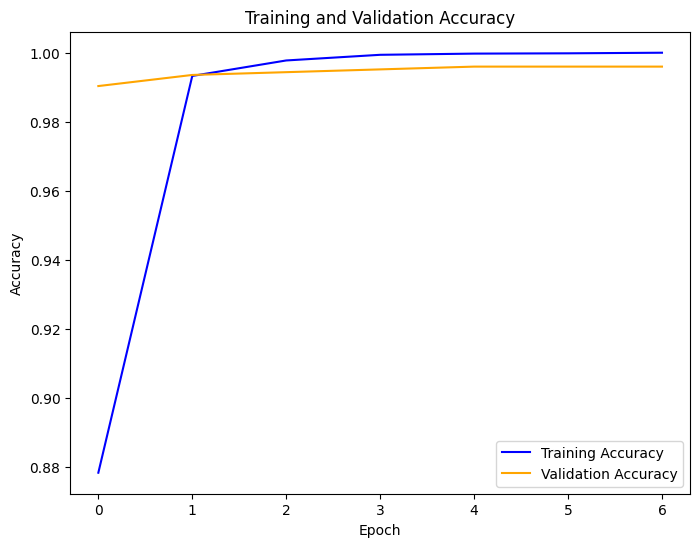

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       1.00      0.99      0.99      1517

    accuracy                           0.99      2487
   macro avg       0.99      0.99      0.99      2487
weighted avg       0.99      0.99      0.99      2487



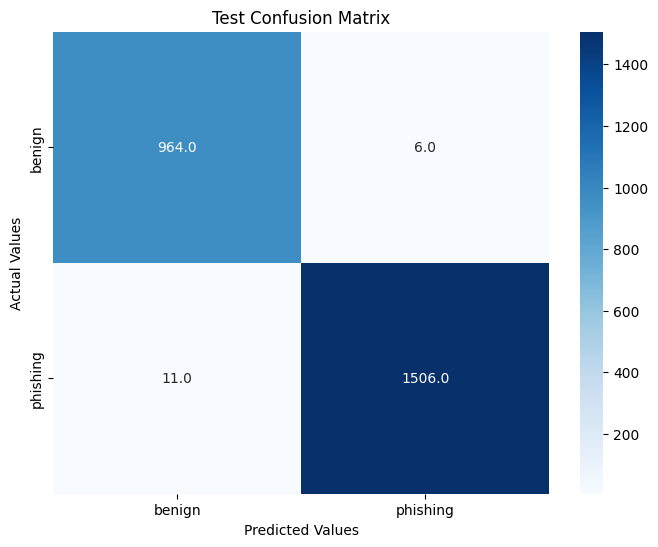


🔍 Misclassified URLs:
                                                     url  true_label  \
4295         https://www.mostratic.com/6TTZ19K/291J3GX8/           1   
2582                     https://www.picklesofindia.com/           1   
1402                           https://mufg-contact.com/           1   
6249                    https://www.git653.com/amz/login           1   
3014         https://www.granfondolafortuna.com/eventos/           1   
6260            https://access-information.duia.us/?main           1   
9997                            https://www.xxfj168.com/           1   
3820   https://clics.info/news/iso-14001-environmenta...           1   
1328                       https://www.trackingdhll.com/           1   
10943  https://forms.office.com/pages/responsepage.as...           0   

       predicted_label  
4295                 0  
2582                 0  
1402                 0  
6249                 0  
3014                 0  
6260                 0  
9997     

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Reset DataFrame index for traceability
df = df.reset_index(drop=True)

# Visualize class distribution
sns.countplot(data=df, x='type')
plt.title('Class Distribution')
plt.show()

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['url'])
vocab_size = len(tokenizer.word_index) + 1

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

max_length = 600
embedding_dim = 100

sequences = tokenizer.texts_to_sequences(df['url'])
X_text = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode target labels
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
y = df['type_code']

# Include extracted features
X_features = df.drop(['url', 'type', 'type_code'], axis=1)

# Combine text and features
X_combined = np.hstack((X_text, X_features))

# Train-validation-test split (with index tracking)
X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
    X_combined, y, df.index, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
    X_temp, y_temp, idx_temp, test_size=0.5, random_state=42)

# CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(64, 5, activation='sigmoid'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.4f}')
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predictions
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test_df = pd.DataFrame(cm_test, index=['benign', 'phishing'], columns=['benign', 'phishing'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_df, annot=True, fmt=".1f", cmap="Blues")
plt.title('Test Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# 🔍 Misclassified URL analysis
y_test_array = y_test.to_numpy()
misclassified_indices = np.where(y_test_pred.flatten() != y_test_array)[0]

# Retrieve misclassified rows using tracked indices
misclassified_rows = df.iloc[idx_test[misclassified_indices]].copy()
misclassified_rows["true_label"] = y_test_array[misclassified_indices]
misclassified_rows["predicted_label"] = y_test_pred.flatten()[misclassified_indices]

# Preview misclassified URLs
print("\n🔍 Misclassified URLs:")
print(misclassified_rows[['url', 'true_label', 'predicted_label']].head(10))


In [49]:
# Convert y_test to NumPy
y_test_array = y_test.to_numpy()

# Get misclassified indices in test set
misclassified_indices = np.where(y_test_pred.flatten() != y_test_array)[0]

# Build test set reference with actual URLs
test_df = df.iloc[idx_test].copy().reset_index(drop=True)

# Add predictions and labels
test_df['true_label'] = y_test_array
test_df['predicted_label'] = y_test_pred.flatten()

# Now safely get only the misclassified ones
misclassified_df = test_df[test_df['true_label'] != test_df['predicted_label']]

# Show and export
print("\n🔍 Verified Misclassified URLs:")
print(misclassified_df[['url', 'true_label', 'predicted_label']].head(10))

# Save to CSV
misclassified_df.to_csv('misclassified_urls.csv', index=False)
print("\n✅ Misclassified URLs saved to 'misclassified_urls.csv'")



🔍 Verified Misclassified URLs:
                                                   url  true_label  \
166        https://www.mostratic.com/6TTZ19K/291J3GX8/           1   
279                    https://www.picklesofindia.com/           1   
420                          https://mufg-contact.com/           1   
426                   https://www.git653.com/amz/login           1   
463        https://www.granfondolafortuna.com/eventos/           1   
530           https://access-information.duia.us/?main           1   
638                           https://www.xxfj168.com/           1   
777  https://clics.info/news/iso-14001-environmenta...           1   
840                      https://www.trackingdhll.com/           1   
854  https://forms.office.com/pages/responsepage.as...           0   

     predicted_label  
166                0  
279                0  
420                0  
426                0  
463                0  
530                0  
638                0  
777          

In [ ]:
# Add an index column to help trace samples later
df = df.reset_index(drop=True)

# Get indices of misclassified samples
misclassified_indices = np.where(y_test_pred.flatten() != y_test.to_numpy())[0]

# Recover the URLs in the test set (use X_temp to match y_test's order)
test_indices = y_temp.index[y_val.shape[0]:]  # since y_val was split before y_test
misclassified_urls = df.iloc[test_indices[misclassified_indices]]  # actual DataFrame rows

# Add prediction and true label columns for inspection
misclassified_urls = misclassified_urls.copy()
misclassified_urls["true_label"] = y_test.to_numpy()[misclassified_indices]
misclassified_urls["predicted_label"] = y_test_pred[misclassified_indices]

# Preview top misclassified URLs
print(misclassified_urls[['url', 'true_label', 'predicted_label']].head())


ValueError: operands could not be broadcast together with shapes (2487,) (3315,) 

c:\Users\Edzel Armengol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7932 - loss: 0.4101 - val_accuracy: 0.9815 - val_loss: 0.0780
Epoch 2/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9863 - loss: 0.0510 - val_accuracy: 0.9868 - val_loss: 0.0389
Epoch 3/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9976 - loss: 0.0143 - val_accuracy: 0.9879 - val_loss: 0.0391
Epoch 4/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9987 - loss: 0.0080 - val_accuracy: 0.9902 - val_loss: 0.0364
Epoch 5/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9995 - loss: 0.0045 - val_accuracy: 0.9898 - val_loss: 0.0369
Epoch 6/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9891 - val_loss: 0.0374
Epoch 7/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9808 - val_loss: 0.0641
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0626
Test Accuracy: 0.9834

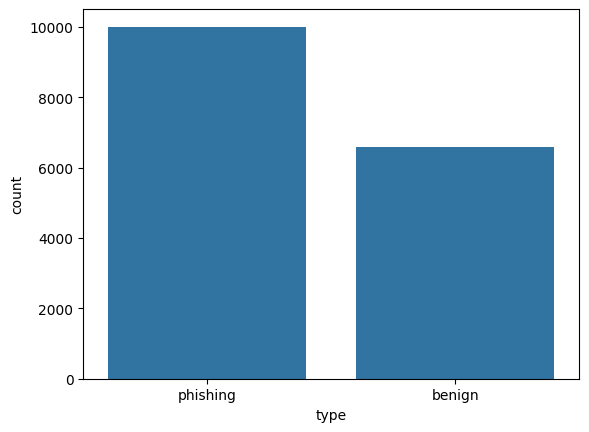

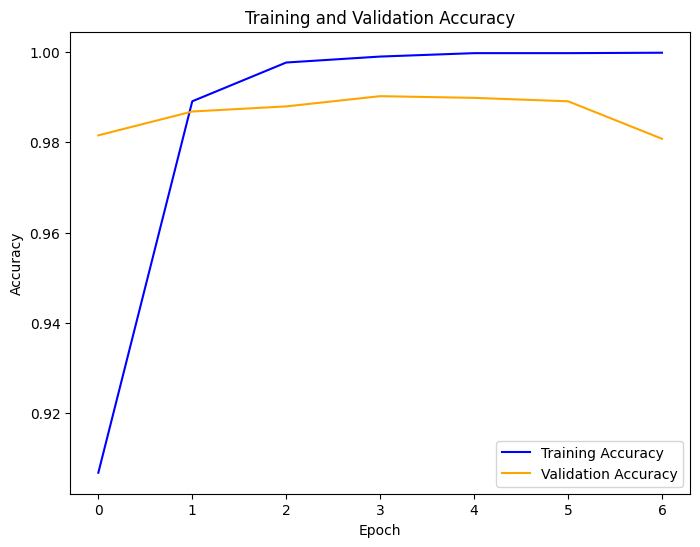

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       1.00      0.98      0.99      2002

    accuracy                           0.98      3315
   macro avg       0.98      0.99      0.98      3315
weighted avg       0.98      0.98      0.98      3315



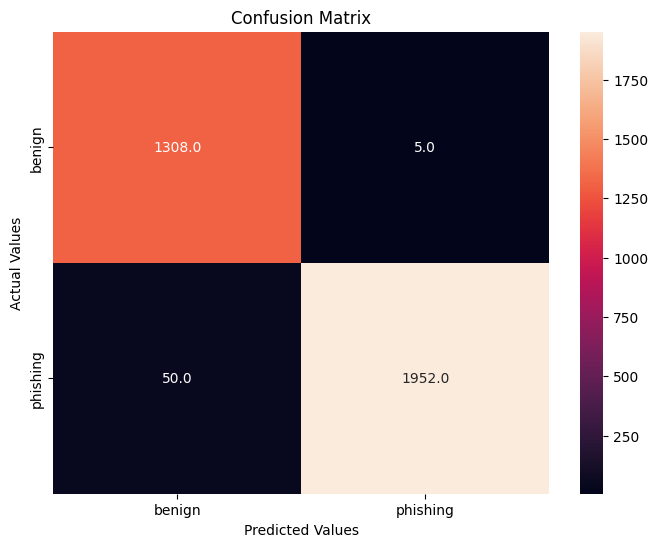

In [42]:
#DNN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv('combined_dataset.csv')

# Visualize class distribution
sns.countplot(data=df, x='type')

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['url'])
vocab_size = len(tokenizer.word_index) + 1

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


max_length = 100
embedding_dim = 100

# Tokenization: URLs are tokenized to transform them into a format that can be processed by a neural network.
sequences = tokenizer.texts_to_sequences(df['url'])
# Padding: This process ensures that all sequences (tokenized URLs) have the same length. Since neural networks process inputs in batches of fixed size, sequences must be uniform in length.
X_text = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode target labels
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
y = df['type_code']

# Include extracted features
X_features = df.drop(['url', 'type', 'type_code'], axis=1)

# Combine text and features
X_combined = np.hstack((X_text, X_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# DNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


# Save the trained model
#model.save('trained_modelDNN.h5')

# from google.colab import files

# Download the trained model
# files.download('trained_modelDNN.h5')

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['benign', 'phishing'], columns=['benign', 'phishing'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [43]:
# Download the trained model
# files.download('trained_modelDNN.h5')


## RNN-LSTM

c:\Users\Edzel Armengol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.8804 - loss: 0.3005 - val_accuracy: 0.9872 - val_loss: 0.0571
Epoch 2/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9858 - loss: 0.0602 - val_accuracy: 0.9906 - val_loss: 0.0464
Epoch 3/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9928 - loss: 0.0348 - val_accuracy: 0.9902 - val_loss: 0.0408
Epoch 4/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.9947 - loss: 0.0234 - val_accuracy: 0.9898 - val_loss: 0.0508
Epoch 5/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9967 - loss: 0.0159 - val_accuracy: 0.9317 - val_loss: 0.3490
Epoch 6/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9849 - loss: 0.0590 - val_accuracy: 0.9910 - val_loss: 0.0510
Epoch 7/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9992 - loss: 0.0063 - val_accuracy: 0.9894 - val_loss: 0.0557
Epoch 8/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.9995 - loss: 0.00

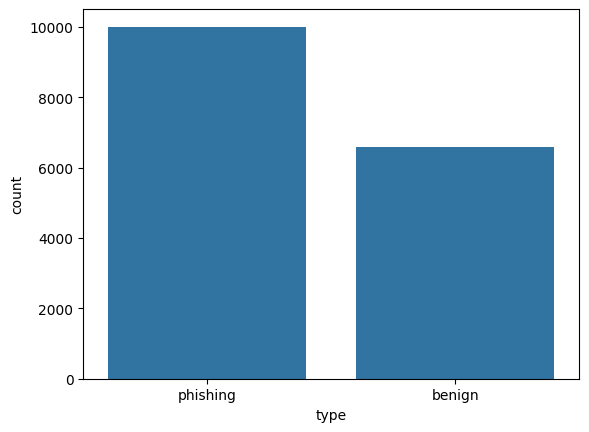

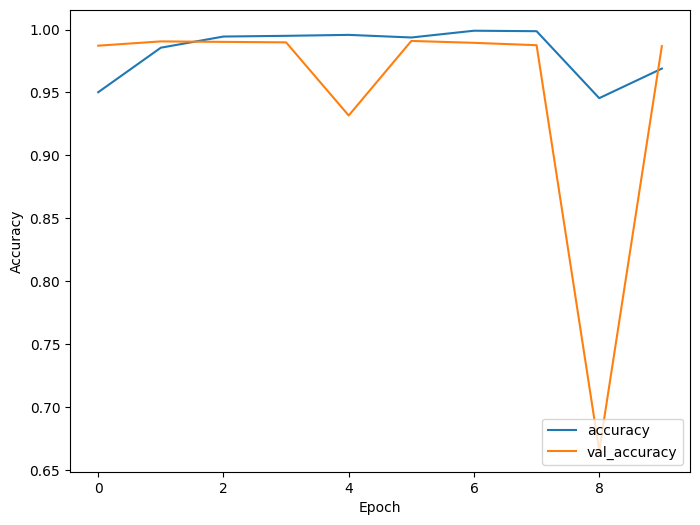

104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1313
           1       0.99      0.99      0.99      2002

    accuracy                           0.99      3315
   macro avg       0.99      0.99      0.99      3315
weighted avg       0.99      0.99      0.99      3315



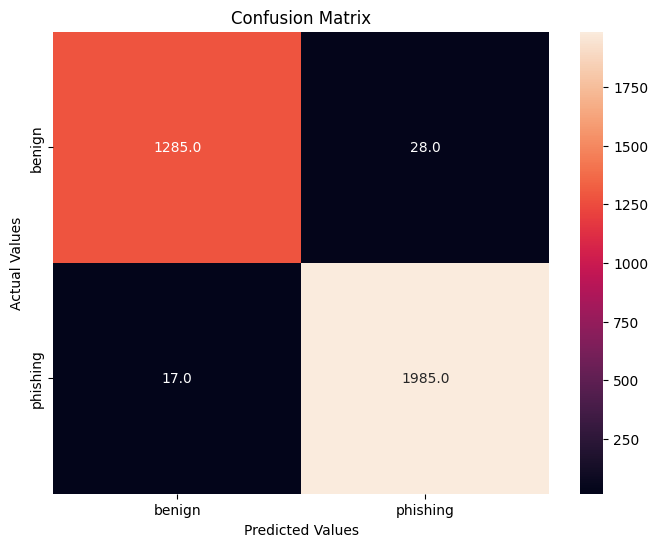

In [44]:
#RNN-LSTM Hybrid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SimpleRNN, SpatialDropout1D

# Load dataset
df = pd.read_csv('combined_dataset.csv')

# Visualize class distribution
sns.countplot(data=df, x='type')

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['url'])
vocab_size = len(tokenizer.word_index) + 1

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


max_length = 100
embedding_dim = 100

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['url'])
# Pad sequences
X_text = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode target labels
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
y = df['type_code']

# Include extracted features
X_features = df.drop(['url', 'type', 'type_code'], axis=1)

# Combine text and features
X_combined = np.hstack((X_text, X_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)



# Define the model architecture
plt.figure(figsize=(8, 6))
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(32, return_sequences=True))  # Add a SimpleRNN layer
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2)) #Add an LSTM layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# Model summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# Download the trained model
# files.download('trained_modelDNN.h5')

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['benign', 'phishing'], columns=['benign', 'phishing'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()